In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model,svm
import matplotlib.pyplot as plt

In [31]:
source_data = pd.read_csv('backdoor/3000_results.csv',sep=',',header=None, usecols= range(21))
workers_ = pd.read_csv("backdoor/3000_workers_selected.csv",sep=",",header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'backdoor/3000_results.csv'

<AxesSubplot:>

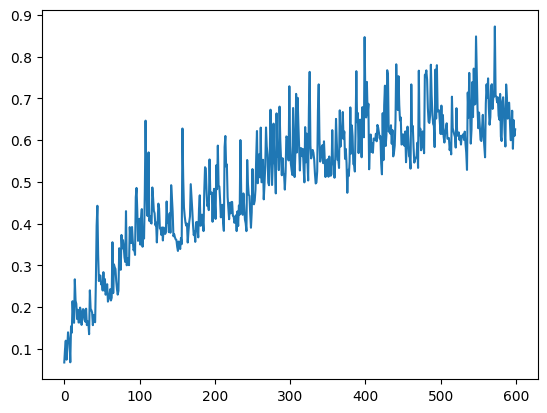

In [32]:
source_data[0][:].plot()

In [4]:
df = source_data
A = df[2]
B = df[3]
C = df[4]
source_data[0] = A/(A+B+C)

<AxesSubplot:>

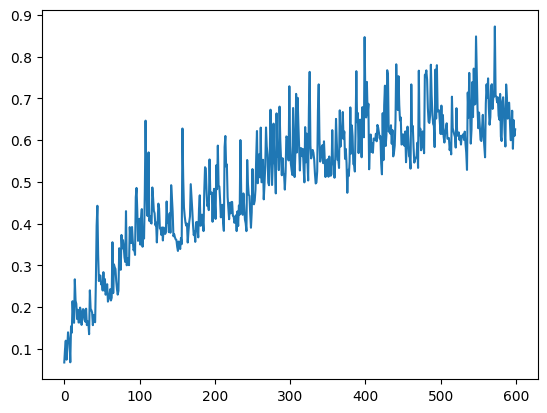

In [5]:
source_data[0][:].plot()

In [197]:
source_data[0][:].mean()

3.2764367816091955

In [22]:
recall = np.array(source_data[0].iloc[100:])   #12 + class_code
workers = np.array(workers_.iloc[100:])

In [23]:
len(recall)

500

In [24]:
arr = []
for t in range(workers.shape[0]):
    label = []
    for i in range(100):
        if i in workers[t]:
            label.append(1)
        else:
            label.append(0)
    arr.append(label)


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
lm = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model = lm.fit(arr, recall) 
arr2 = []
for i in range(100):
    label = []
    for j in range(100):
        if i == j:
            label.append(1)
        else:
            label.append(0)
    arr2.append(label)
predictions = lm.predict(arr2)

In [26]:
predictions

array([0.54954407, 0.5722526 , 0.55914934, 0.68850632, 0.54954407,
       0.54954407, 0.54954407, 0.54954407, 0.5186513 , 0.52306553,
       0.54954407, 0.56164303, 0.54954407, 0.54954407, 0.52602889,
       0.54345927, 0.54954407, 0.52883124, 0.65384897, 0.54954407,
       0.54954407, 0.54954407, 0.52997901, 0.51731217, 0.54954407,
       0.54954407, 0.54954407, 0.56002201, 0.55168582, 0.54401188,
       0.56014836, 0.53711661, 0.54954407, 0.54954407, 0.54954407,
       0.54954407, 0.53425123, 0.50986691, 0.54954407, 0.54954407,
       0.54954407, 0.54954407, 0.55023371, 0.54954407, 0.54954407,
       0.54954407, 0.61203099, 0.54954407, 0.54954407, 0.54841406,
       0.54954407, 0.54954407, 0.54954407, 0.54650638, 0.55811711,
       0.54229269, 0.54954407, 0.55152739, 0.55491061, 0.54954407,
       0.55524462, 0.57467756, 0.54954407, 0.54954407, 0.57516409,
       0.51941154, 0.59224734, 0.54954407, 0.56700237, 0.54954407,
       0.56617751, 0.54954407, 0.53139114, 0.55570922, 0.54954

In [27]:
lst = {predictions[i] : str(i) for i in range(len(predictions))}
lst = sorted(lst.items(), key= lambda ele : ele[0])
lst

[(0.509866910645811, '37'),
 (0.5172836948180876, '97'),
 (0.5173121671279101, '23'),
 (0.5186512957708616, '8'),
 (0.5194115370160419, '65'),
 (0.5230655269714889, '9'),
 (0.526028888127146, '14'),
 (0.5270907418605697, '80'),
 (0.5288312422647624, '17'),
 (0.5290919743865822, '84'),
 (0.5299790063480401, '22'),
 (0.5313911355879922, '72'),
 (0.531924106020847, '77'),
 (0.5342512340244144, '36'),
 (0.5371166059848641, '31'),
 (0.5422926937709028, '55'),
 (0.5434592720601704, '15'),
 (0.5440118827448326, '29'),
 (0.5440488672645811, '76'),
 (0.5448091730212641, '90'),
 (0.5465063760237028, '53'),
 (0.5471946710619824, '87'),
 (0.5472197039686459, '88'),
 (0.548414057799735, '49'),
 (0.5495440713211306, '99'),
 (0.5502337103462291, '42'),
 (0.5515273863334152, '57'),
 (0.5516858177896066, '28'),
 (0.5549106074420188, '58'),
 (0.5552446171565444, '60'),
 (0.5557092209299277, '73'),
 (0.5581171066093461, '54'),
 (0.5591493380116166, '2'),
 (0.5600220145153832, '27'),
 (0.5601483570925255,

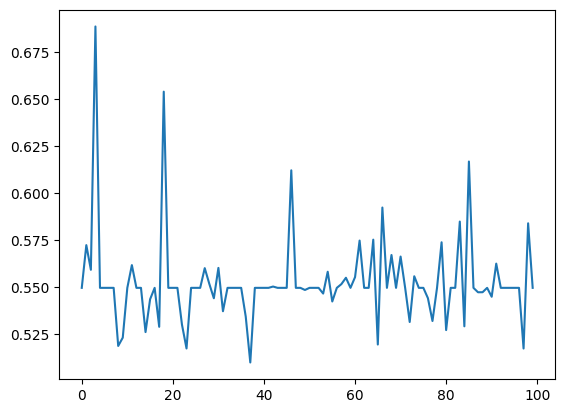

In [28]:
import matplotlib.pyplot as plt
plt.plot(predictions)

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(predictions.reshape(100,1))
print(y_kmeans)
arr1 = []
arr2 = []
for i in range(100):
    if y_kmeans[i] == 0:
        arr1.append(i)
    elif y_kmeans[i] == 1:
        arr2.append(i)
print(arr1)
print(arr2)
if arr1[0]>arr2[0]:
    print("bad clients ->",arr2)
else:
    print("bad clients ->",arr1)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[3, 18, 46, 85]
bad clients -> [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [35]:
len(arr1)

44